In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import re
from IPython.display import display, HTML
sns.set(context='paper', style='whitegrid', color_codes=True, font_scale=1.8)
colorcycle = [(0.498, 0.788, 0.498),
              (0.745, 0.682, 0.831),
              (0.992, 0.753, 0.525),
              (0.220, 0.424, 0.690),
              (0.749, 0.357, 0.090),
              (1.000, 1.000, 0.600),
              (0.941, 0.008, 0.498),
              (0.400, 0.400, 0.400)]
sns.set_palette(colorcycle)
mpl.rcParams['figure.max_open_warning'] = 65
mpl.rcParams['figure.figsize'] = [12, 7]
mpl.rcParams['text.usetex'] = False

from speclib import misc, plotting, loaders

import missingno as msno

%matplotlib inline

In [2]:
df = pd.read_json('../../allan_data/RGender_.json')
userAlias = loaders.Useralias()

q = misc.QuestionCompleter(df)
f = misc.QuestionFilterer(df)

df.head()

,alcohol_binge10__answer,alcohol_binge10__answer_type,alcohol_binge10__condition,alcohol_binge10__question,alcohol_binge10__response,alcohol_binge5__answer,alcohol_binge5__answer_type,alcohol_binge5__condition,alcohol_binge5__question,alcohol_binge5__response,...,worries_partner__answer,worries_partner__answer_type,worries_partner__condition,worries_partner__question,worries_partner__response,worries_zieblings__answer,worries_zieblings__answer_type,worries_zieblings__condition,worries_zieblings__question,worries_zieblings__response
u0001,1.0,radio,alcohol_debut != 'Jeg har aldrig drukket alkohol',Drukket mere end 10 genstande på en dag/aften,1 gange,2.0,radio,alcohol_debut != 'Jeg har aldrig drukket alkohol',Drukket mere end 5 genstande på en dag/aften,2 gange,...,NaN,radio,False,Kæreste/ægtefælle,Har ingen,3.0,radio,False,Søskende,Sjældent
u0002,1.0,radio,alcohol_debut != 'Jeg har aldrig drukket alkohol',Drukket mere end 10 genstande på en dag/aften,1 gange,0.0,radio,alcohol_debut != 'Jeg har aldrig drukket alkohol',Drukket mere end 5 genstande på en dag/aften,0 gange,...,2.0,radio,False,Kæreste/ægtefælle,Af og til,NaN,radio,False,Søskende,Har ingen
u0003,2.0,radio,alcohol_debut != 'Jeg har aldrig drukket alkohol',Drukket mere end 10 genstande på en dag/aften,2 gange,2.0,radio,alcohol_debut != 'Jeg har aldrig drukket alkohol',Drukket mere end 5 genstande på en dag/aften,2 gange,...,NaN,radio,False,Kæreste/ægtefælle,Har ingen,2.0,radio,False,Søskende,Af og til
u0004,1.0,radio,alcohol_debut != 'Jeg har aldrig drukket alkohol',Drukket mere end 10 genstande på en dag/aften,1 gange,1.0,radio,alcohol_debut != 'Jeg har aldrig drukket alkohol',Drukket mere end 5 genstande på en dag/aften,1 gange,...,NaN,radio,False,Kæreste/ægtefælle,Har ingen,NaN,radio,False,Søskende,Har ingen
u0006,0.0,radio,alcohol_debut != 'Jeg har aldrig drukket alkohol',Drukket mere end 10 genstande på en dag/aften,0 gange,1.0,radio,alcohol_debut != 'Jeg har aldrig drukket alkohol',Drukket mere end 5 genstande på en dag/aften,1 gange,...,2.0,radio,False,Kæreste/ægtefælle,Af og til,3.0,radio,False,Søskende,Sjældent


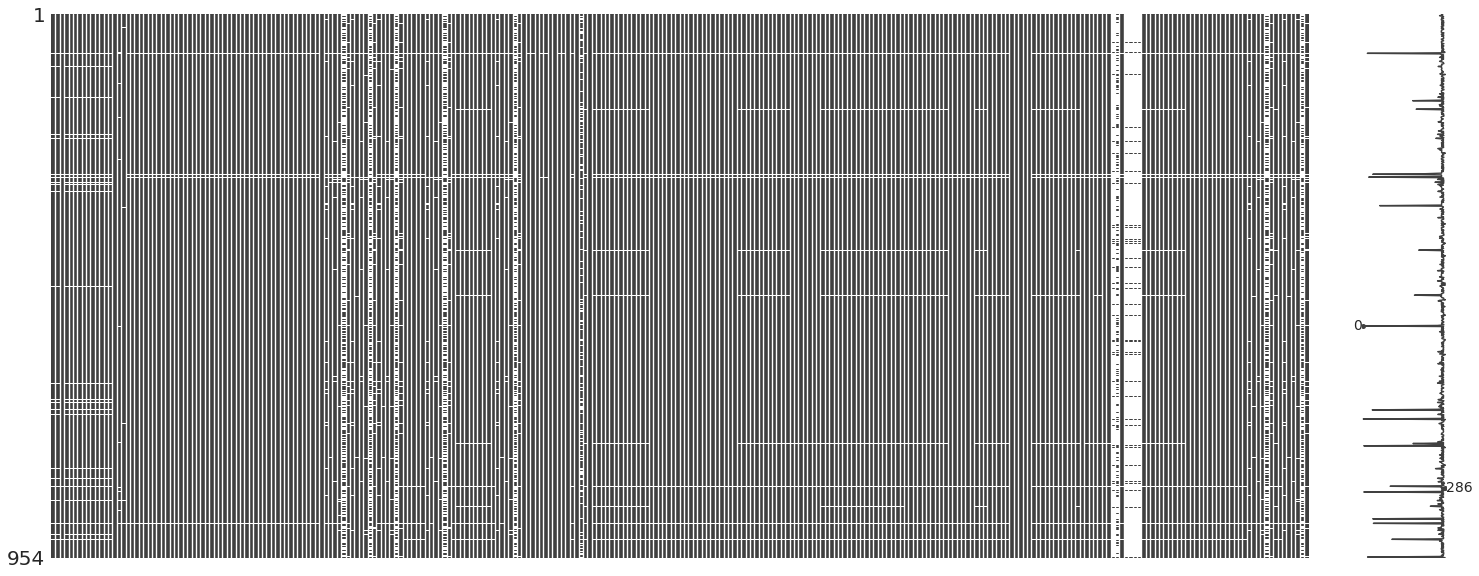

In [3]:
msno.matrix(f.__answer)

In [4]:
dna = f.__answer.isna()

dnas = dna.sum(axis=0).sort_values(ascending=False)

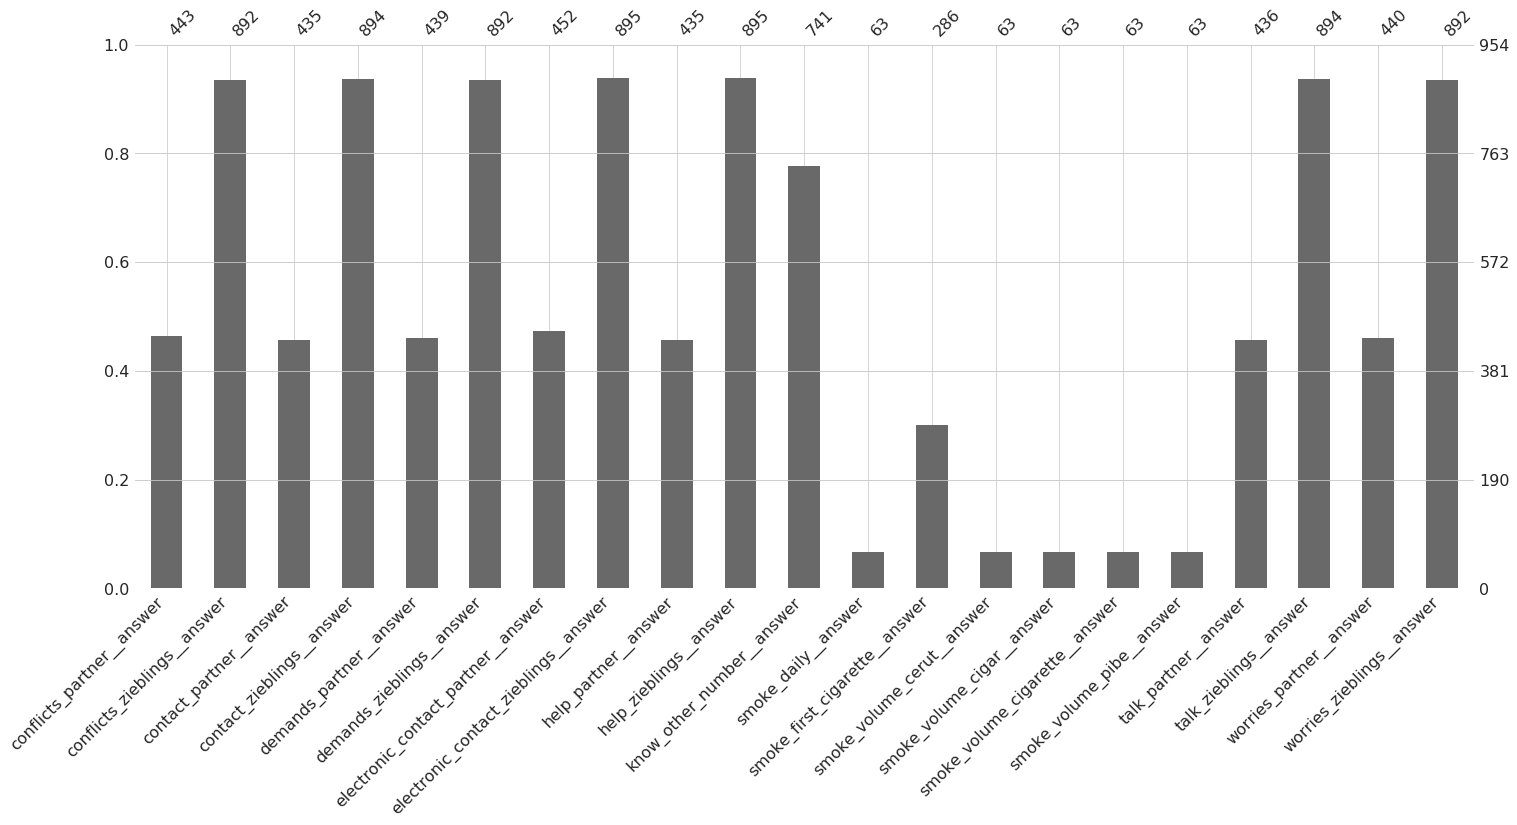

In [5]:
msno.bar(f.__answer.loc[:, dnas > dnas.mean()])

In [63]:
dnas = dna.sum(axis=1)

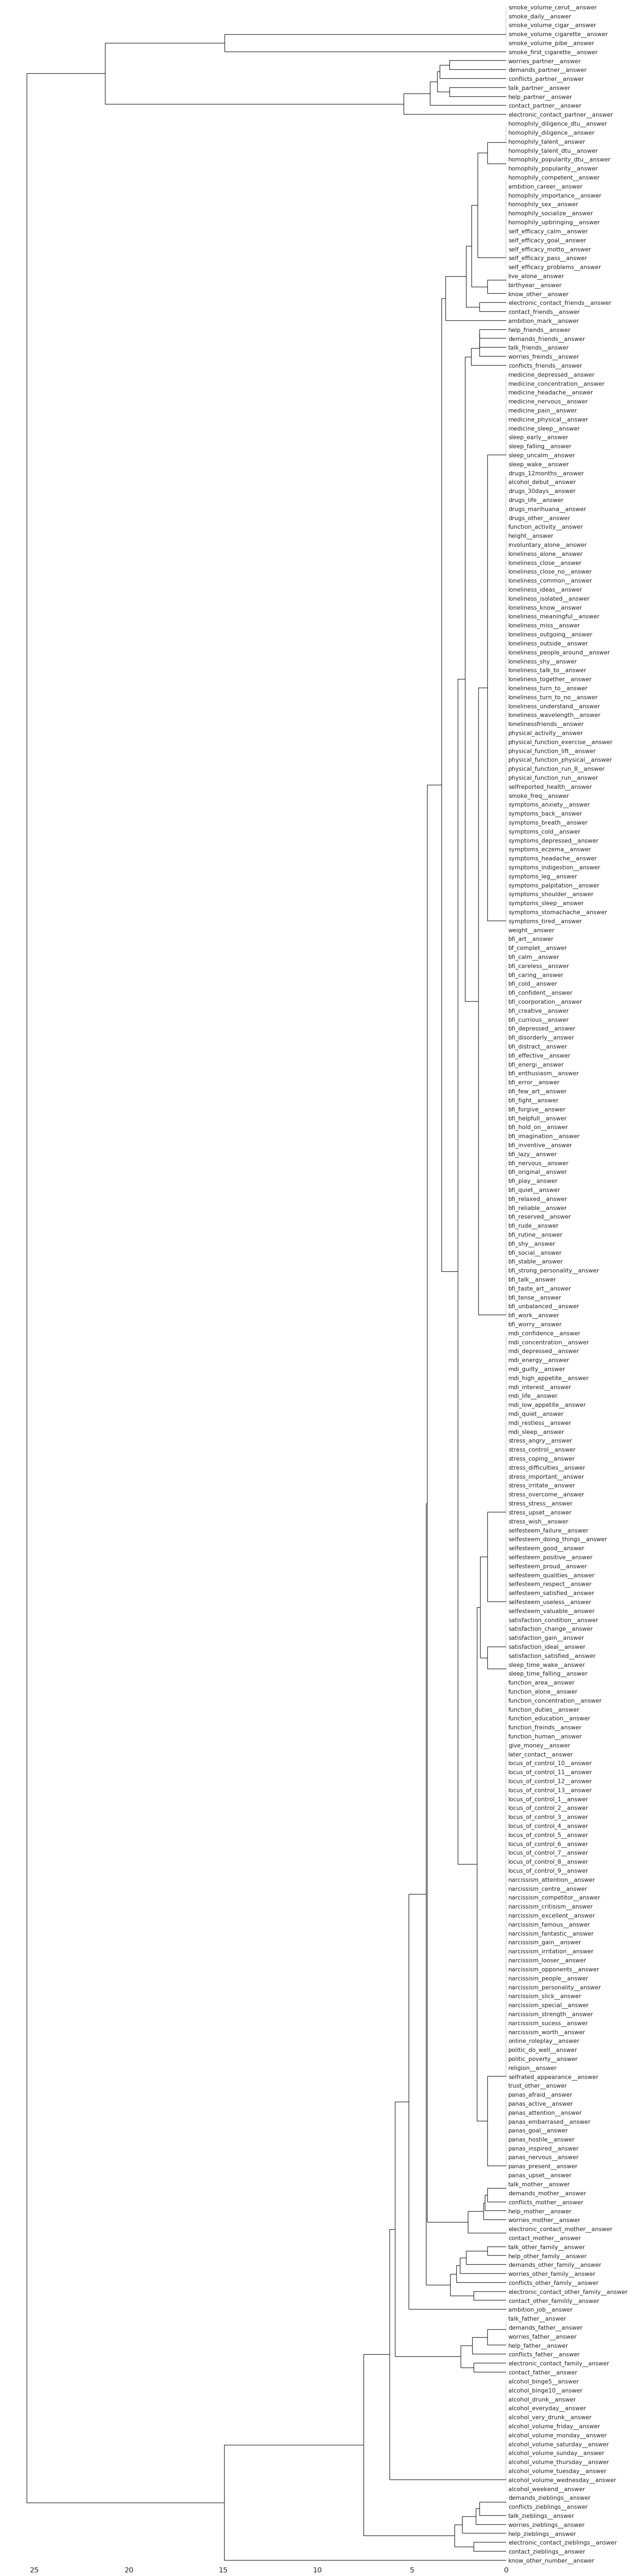

In [66]:
msno.dendrogram(f.__answer, )

In [3]:
def get_invert_idx_dict(idx):
    idx = sorted(idx.dropna().unique().tolist())
    return {i: j for (i, j) in zip(idx, reversed(idx))}

assert get_invert_idx_dict(pd.Series(np.arange(3))) == {0:2, 1:1, 2:0}

In [4]:
def prt(dct):
    for k, v in dct.items():
        print(f"{k}: {v}")

In [5]:
df.electronic_contact_family__response.value_counts()

Ca. én gang om ugen                 329
Flere dage om ugen                  280
Én til tre gange om måneden         210
Sjældnere end én gang om måneden     64
Aldrig                               36
Har ingen                            28
Name: electronic_contact_family__response, dtype: int64

In [6]:
misc.questionSummary(df, q.electronic_contact_family)

,response_index,answer_index,count
0,Flere dage om ugen,0.0,280
1,Ca. én gang om ugen,1.0,329
2,Én til tre gange om måneden,2.0,210
3,Sjældnere end én gang om måneden,3.0,64
4,Aldrig,4.0,36
5,Har ingen,NaN,35
